# Deep Learning in Medicine
### BMSC-GA 4493, BMIN-GA 3007 
### Spring 2023
### Homework 1

**Learning Objectives**:

1. Basic Math Revision.
2. Introduction to Machine Learning.
3. Logistic Regression Model.
4. Multi-layer Perceptron Model.

**Instruction** 

1. If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex. See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues with writing equations. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

2. Upload and Submit your final jupyter notebook file on <a href='https://brightspace.nyu.edu/d2l/home/158477'>Brightspace</a>

3. **Deadline: Thursday Feb 16th 2023****

4. ***HW submission instructions:*** Students should submit a zipped folder named ***netid***_hw***x*** where x is the homework number . The submission should consist of jupyter notebook with all the plots and expected outputs clearly visible in it. The zipped folder should also contain the data files. We should be able to run your ipynb without making directory changes. Not following the protocol might lead to deduction of scores.

---
# Question 1: Math and Machine Learning Revision (16 points)

- ### Take derivatives (partial derivatives wherever required) of functions from 1.1 to 1.7 (16 points)

### 1.1. (2 point)
$f(x) = \frac{1}{\sqrt{3-x}}$

**Ans**

$\frac{d}{dx}f(x) = -\frac 1 2 (3-x)^{-1/2} = -\frac 1 2 (3-x)^{-3/2}(3-x)' = \frac 1 2 (3-x)^{-3/2}$

### 1.2. (2 point)
$f(x) = e^xx^3$

**Ans** 

$\frac{d}{dx}f(x) = e^x x^3 + 3x^2e^x = (3x^2+x^3)e^x$

### 1.3. (2 point)
$f(x) = \frac{e^x + \sin x}{1+\log x}$

**Ans** 

$\frac{d}{dx}f(x) = \frac{[(e^x+\cos x)(1+\log x)]+[(e^x+\sin x)(1/x)]}{(1+\log x)^2} = \frac{x(e^x+\cos x)(1+\log x)+(e^x+\sin x)}{x(1+\log x)^2} $

### 1.4. (2 point)
$f(x) = \tanh x$

**Ans** 
$\frac{d}{dx}f(x) = sech^2 x$

### 1.5. (2 point)
$f(A,X) = \sum_{i=1}^5 \ln (\frac{1}{a_ix_i^3})$

where $A = (a_1, a_2, a_3, a_4, a_5)$ and $X = (x_1, x_2, x_3, x_4, x_5)$ (You can give expression of $\frac{d}{dx_i} f(A,X)$ as well)

**Ans** 

$\frac{d}{dX}f(A_i,X_i) = \frac{d}{dX_i} \ln (\frac{X_i^{-3}}{A_i}) = -3 \frac{d}{dX_i} (\ln X_i - \ln A_i) = \frac{-3}{X_i}$

### 1.6. (2 point)
$f(A,X) = \sum_{i=1}^{100} (\frac{1}{3x_i + e^{-a_{~i}x_{~i}}})$

where $A = (a_1, ..., a_{100})$ and $X = (x_1, ..., x_{100})$ (You can give expression of $\frac{d}{dx_i}$)

**Ans** 

$$\frac{d}{dX_i}f(A_i,X_i) = \frac{d}{dX_i} (3X_i+e^{-AX_i})^{-1} = -(3X_i+e^{-A_iX_i})^{-2}(3-A_ie^{-A_iX_i})\\= \frac{A_ie^{-A_iX_i}-3}{(3X_i+e^{-A_iX_i})^{2}}$$

### 1.7.  Loss Functions (2 + 2 points)
Mammography is one of the most effective method for breast cancer screening. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation might lead to unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, you have been assigned to develop a machine learning model that will act as a computer-aided diagnosis (CAD) system. 

To help physicians in their decision to perform a breast biopsy on a suspicious lesion or to perform a short term follow-up examination, your model should identify the mammographic mass lesion as Benign(0)/Malign(1) given its BI-RADS attributes


#### 1.7.a What kind of supervised learning problem would you consider? Express your model's probability for one observation $p(y|x)$? Give expression of log probability as well

**Ans**

I would consider using a binary classification algorithm. For simplicity, we may use logistic regression. The output of the classifier will be the probability of being in class 1(malign), and we can further classify the output to class 1 or 0 by a desicion boundary. (Usually 0.5, but we may also apply some assymetric errror control methods and change the boundary in this example)

Let the prediction of classifier $h$ as $p(y=1|x) = \hat y$

$p(y|x) = \hat y ^y(1-\hat y)^{1-y}~\because$ the outcome is binary 0 or 1

$\log p(y|x) = y\log \hat y+(1-y)\log(1-\hat y)$

#### 1.7.b You want to design a loss function that prefers the correct output of the training examples to be more likely. 

#### Derive a loss function that would allow you to choose parameters $w,b$ of your model that maximize a likelihood that does that. Give explaination would such a loss function be good choice in terms of parameter updation.

*Hint:* Think about the expression from the previous part.

**Ans**

Since the output is probability, the goal is to find the parameters with maximum likelihood. We can use the cross-entropy loss function because the optimal parameters of maximum likelihood should be the same as the minimum of negative log likelihood.

Given the weight and bias, $\hat y = \sigma(wx+b)$

$L_{CE}(\hat y, y) = -\log p(y|x) = y\log \sigma(wx+b)+(1-y)\log[1-\sigma(wx+b)]$


---
# Question 2: Solving Linear Regression via Mean Squared Error (MSE) Optimization Problem (34 points)

Imagine that you have measured two variables X and Y, for a simple task, and you belive that they might be linearly related to each other. Here, our input X has 2 dimensions, and the output has 1 dimension. We will use super-script to indicate which sample it is, and sub-scipt to indicate which dimension it is. 
The measurements are as follows:

###### (Training data D = {($X^1$, $Y^1$), ($X^2$, $Y^2$), ($X^3$, $Y^3$)})

Sample 1: $X^1 = (x_1^1, x_2^1) = (1, 1)$,   $Y^1$ = 2

Sample 2: $X^2 = (x_1^2, x_2^2) = (1, 2)$,   $Y^2$ = 4

Sample 3: $X^3 = (x_1^3, x_2^3) = (2, 2)$,   $Y^3$ = 5

If we assume that the relationship between X and Y is linear, we can write this relationship as:

$Y = f_{W,B}(X) = WX + B = w_1*x_1 + w_2*x_2 + B$

where $W = (w_1, w_2)$ and $B$ are the parameters of the model.	
We are interested in finding best values for W and B.	
We define 'best' in terms of a loss function between $f_{W,b}(X_i)$ and $Y_i$ for each ($X_i$ and $Y_i$) in the training data. 	
Since $Y_i$s are real numbers, let's consider Mean Squared Error loss. 

Remember that Mean Squared Error for this function, over training data, and W and B is:

$MSELoss(D={(X_1, Y_1), (X_2, Y_2), (X_3, Y_3)}), W, B) = \frac{1}{3}\sum_{i=1}^{3} (f_{W,B}(X_i) - Y_i)^2 $

### 2.1. (3 points)
Compute the partial derivative of $MSELoss(D, W, B)$, With respect to W and B.	
Remember that $X_1$, $X_2$, $X_3$, $Y_1$, $Y_2$, and $Y_3$ are constants, and already given to us as training data above.

$\frac{d}{d w_1} MSELoss(D, W, B) = ?$

$\frac{d}{d w_2} MSELoss(D, W, B) = ?$

$\frac{d}{d B} MSELoss(D, W, B) = ?$

**Ans**

$MSELoss(D,W,B) = \frac 1 n \Sigma(w_1*X_1 + w_2*X_2 + B-Y_i)^2$

1. 
$\frac{d}{d w_1} MSELoss(D, W, B) = \frac 1 n 2(w_1*X_1 + w_2*X_2 + B-Y_i)(X_1)= \frac{12w_1+14w_2+8B-32}{3}
$

2. 
$\frac{d}{d w_2} MSELoss(D, W, B) = \frac 1 n 2(w_1*X_1 + w_2*X_2 + B-Y_i)(X_2)=\frac{14w_1+18w_2+10B-40}{3}$

3. 
$\frac{d}{d B} MSELoss(D, W, B) = \frac 1 n 2(w_1*X_1 + w_2*X_2 + B-Y_i)(1)=\frac{2}{3}(4w_1+5w_2+3B-11)$



### 2.2. (4 points)
With $w_1 = 0.1$ , $w_2 = 0.1$ and $B = 0.1$, check if the analytical solution of partial derivative you derived above match the solution of using pytorch autograd. See https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html for how to use pytorch autograd to get gradient of any general objective function.

**Ans**

Using 500 epoch and 0.01 as learning rate, we can see that the trend of the gradient descent is approaching the result of using hat function for estimating linear regression coefficients.

In [1]:
# Use sklearn model as ref
from sklearn.linear_model import LinearRegression
import numpy as np
x=np.array([[1,1], [1,2],[2,2]], dtype=float)
y=np.array([[2], [4], [5]], dtype=float)
mod=LinearRegression().fit(x, y)

In [2]:
import torch
# x1: 1,1 y1:2
# x2: 1,2 y2: 4
# x3: 2,2 y3: 5
def forward(x,w,b):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss(y,y_pred):
    return ((y-y_pred)**2).mean()

x=torch.tensor([[1,1], [1,2],[2,2]], dtype=torch.float32)
y=torch.tensor([[2],[4],[5]], dtype=torch.float32)
w=torch.tensor([[0.1],[0.1]], dtype=torch.float32, requires_grad=True )
b=torch.tensor([0.1], dtype=torch.float32, requires_grad=True )

learning_rate = 0.05
it = 500
for epoch in range(it):
    y_pred = forward(x,w,b)
    l = loss(y,y_pred)
    l.backward()
    with torch.no_grad(): # similar to requires_grad = False
        w -= learning_rate * w.grad 
        b -= learning_rate * b.grad 
    if epoch %100==0:
        print(f"Epoch {epoch}: w1={w[0].item():.5f}, w2={w[1].item():.5f}, B={b.item():.5f}")
    b.grad.zero_()
    w.grad.zero_()
print(f"Epoch 500: w1={w[0].item():.5f}, w2={w[1].item():.5f}, B={b.item():.5f}")
print(f"Hat function: w1={mod.coef_[0][0]:.5f}, w2={mod.coef_[0][1]:.5f}, B={mod.intercept_[0]:.5f}")

/opt/anaconda3/envs/DeepL/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 0: w1=0.57667, w2=0.69667, B=0.42667
Epoch 100: w1=0.91514, w2=1.51945, B=-0.03323
Epoch 200: w1=0.93935, w2=1.73158, B=-0.44117
Epoch 300: w1=0.96139, w2=1.84805, B=-0.67756
Epoch 400: w1=0.97661, w2=1.91333, B=-0.81414
Epoch 500: w1=0.98610, w2=1.95008, B=-0.89234
Hat function: w1=1.00000, w2=2.00000, B=-1.00000


### 2.3. (3 points)
Use matplotlib library and plot $\frac{d}{d w1} MSELoss(D, W, B)$ for $w_1 = np.arange(0, 5, 0.5)$, when $w_2$ equals 4, and B equals to -2.

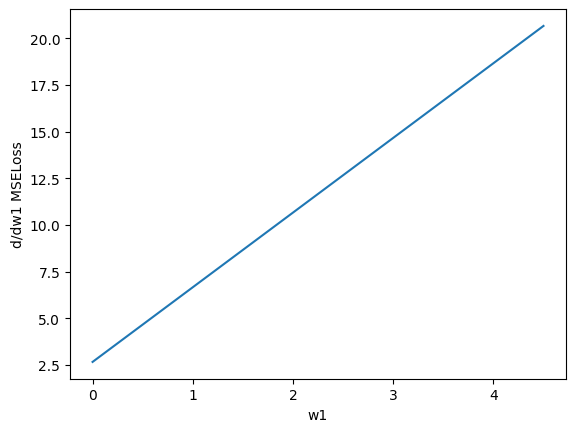

In [3]:
import matplotlib.pyplot as plt
import numpy as np
w1 = np.arange(0, 5, 0.5)
B = -2 ; w2 = 4
y_axis = (12*w1+14*w2+8*B-32)/3
plt.plot(w1, y_axis)
plt.xlabel('w1')
plt.ylabel('d/dw1 MSELoss')
plt.show()

### 2.4. (4 points)
What values of $w_1$, $w_2$ and $B$, make all partial derivatives zero?

**Ans**

From the answer of 2.2, we know that the values will be $w1=1, w2=2, B=-1$

### 2.5 (10 points) 
If you start from an initial point $w_1^0 = 0.1$ , $w_2^0 = 0.1$ and $B^0 = 0.1$, and iteratively update your $w_1$, $w_2$, and B via gradient descent as follows:
    
$ w_1^{t+1} = w_1^t - 0.01 * \frac{d}{d w_1} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ w_2^{t+1} = w_2^t - 0.01 * \frac{d}{d w_2} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ B^{t+1} = B^t - 0.01 * \frac{d}{d B} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $
(Note: This is gradient descent with a 0.01 learning rate.)

What are the values of Ws and B over iterations 0 to 2000? (Don't compute by hand! Write a code!)
Write a python script that computes these values for 2000 iterations, i.e. lists of $\{w_1^0, w^1_1,.., w_1^{2000}\}$, $\{w_2^0, w_2^1,.., w_2^{2000}\}$, and $\{B^0, B^1,.., B^{2000}\}$.	
Plot the lists of $w_1$s, $w_2$s and Bs over 2000 iterations.

Knowing that:

1. 
$\frac{d}{d w_1} MSELoss(D, W, B) = \frac 1 n 2(w_1*X_1 + w_2*X_2 + B-Y_i)(X_1)= \frac{12w_1+14w_2+8B-32}{3}
$

2. 
$\frac{d}{d w_2} MSELoss(D, W, B) = \frac 1 n 2(w_1*X_1 + w_2*X_2 + B-Y_i)(X_2)=\frac{14w_1+18w_2+10B-40}{3}$

3. 
$\frac{d}{d B} MSELoss(D, W, B) = \frac 1 n 2(w_1*X_1 + w_2*X_2 + B-Y_i)(1)=\frac{2}{3}(4w_1+5w_2+3B-11)$

We can calculate the gradient descent of the 3 parameters. The learning curve shows that only w1 is reaching it's steady state.

Epoch 0: w1=0.10000, w2=0.10000, B=0.10000
Epoch 200: w1=0.92999, w2=1.30808, B=0.31767
Epoch 400: w1=0.92612, w2=1.45932, B=0.05687
Epoch 600: w1=0.92975, w2=1.57549, B=-0.15283
Epoch 800: w1=0.93686, w2=1.66541, B=-0.32125
Epoch 1000: w1=0.94516, w2=1.73546, B=-0.45638
Epoch 1200: w1=0.95343, w2=1.79033, B=-0.56473
Epoch 1400: w1=0.96106, w2=1.83350, B=-0.65156
Epoch 1600: w1=0.96780, w2=1.86757, B=-0.72112
Epoch 1800: w1=0.97359, w2=1.89454, B=-0.77682
Epoch 2000: w1=0.97847, w2=1.91593, B=-0.82142
Epoch 2000: w1=0.97849, w2=1.91603, B=-0.82162


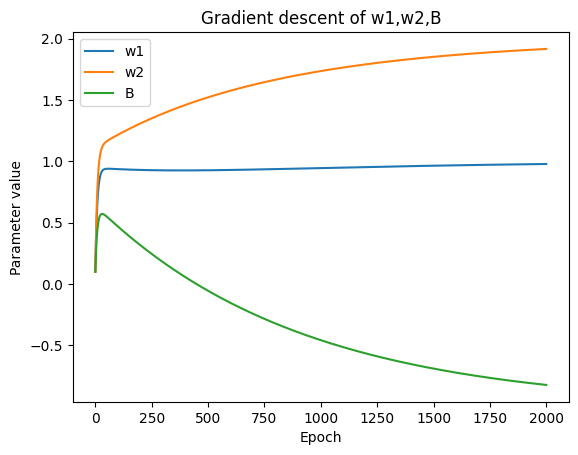

In [4]:
def gradient_descent(w1=0.1,w2=0.1,B=0.1, lr=0.01, it=2000):
    # Goal: to generate gradients of w1,w2,B
    print(f"Epoch 0: w1={w1:.5f}, w2={w2:.5f}, B={B:.5f}")
    yield w1,w2,B
    for epoch in range(1,it+1):
        if epoch %200==0:
            print(f"Epoch {epoch}: w1={w1:.5f}, w2={w2:.5f}, B={B:.5f}")
        w1 -= lr * ((12*w1+14*w2+8*B-32)/3)
        w2 -= lr * ((14*w1+18*w2+10*B-40)/3)
        B -= lr * ((2/3)*(4*w1+5*w2+3*B-11))
        yield w1,w2,B
    print(f"Epoch {epoch}: w1={w1:.5f}, w2={w2:.5f}, B={B:.5f}")
    
# calculation:
output = list(gradient_descent())  

# axis values:
x_axis = list(range(2001))
w1s = list(map(lambda x:x[0], output)) 
w2s = list(map(lambda x:x[1], output))
Bs = list(map(lambda x:x[2], output))

# Plot:
fig, ax = plt.subplots()
ax.plot(x_axis, w1s, label='w1')
ax.plot(x_axis, w2s, label='w2')
ax.plot(x_axis, Bs, label='B')
ax.set_xlabel('Epoch')
ax.set_ylabel('Parameter value')
ax.set_title('Gradient descent of w1,w2,B')
ax.legend()
plt.show()

### 2.6. (10 points)
Now that you learned the math and made the code yourself, we will use pytorch and automatic differentiation, to find optimal W and B!	
Again, consider data to be D = {($X_1$, $Y_1$), ($X_2$, $Y_2$), ($X_3$, $Y_3$)}) = {((1,1), 2), ((1,2), 4), ((2,2), 5)}.

Some of your steps are here. Fill in the rest and show a plot of the loss function, $w_1$, $w_2$ and B over these 2000 epochs.

data X is: [(1, 1), (1, 2), (2, 2)]
data Y is: [2, 4, 5]
epoch: 200, loss=0.11596, params(w1,w2,B): 1.20730,1.20799,0.10005
epoch: 400, loss=0.06888, params(w1,w2,B): 1.10380,1.40835,-0.10568
epoch: 600, loss=0.04205, params(w1,w2,B): 1.04390,1.55291,-0.27511
epoch: 800, loss=0.02616, params(w1,w2,B): 1.01041,1.65868,-0.41378
epoch: 1000, loss=0.01648, params(w1,w2,B): 0.99273,1.73712,-0.52676
epoch: 1200, loss=0.01046, params(w1,w2,B): 0.98432,1.79599,-0.61849
epoch: 1400, loss=0.00668, params(w1,w2,B): 0.98122,1.84068,-0.69277
epoch: 1600, loss=0.00427, params(w1,w2,B): 0.98103,1.87492,-0.75279
epoch: 1800, loss=0.00274, params(w1,w2,B): 0.98232,1.90138,-0.80121
epoch: 2000, loss=0.00176, params(w1,w2,B): 0.98427,1.92197,-0.84023


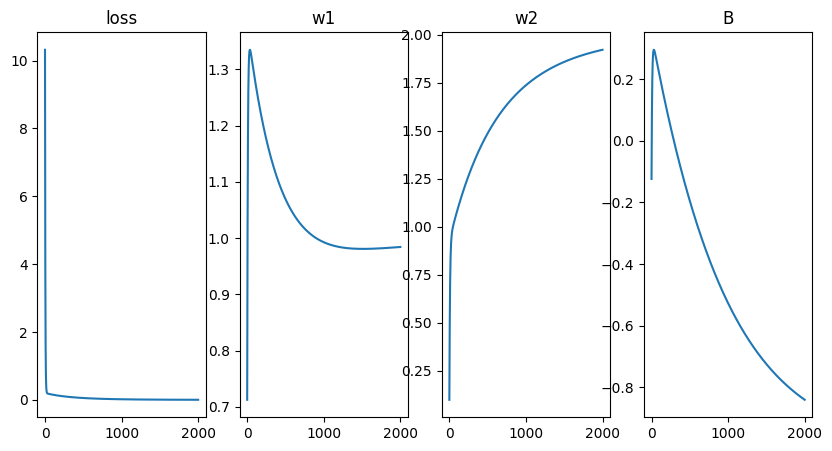

In [5]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
from torch.autograd import Variable
D = [((1,1), 2), ((1,2), 4), ((2,2),5)]
X = [d[0] for d in D]
Y = [d[1] for d in D]
print('data X is:', X)
print('data Y is:', Y)

model = torch.nn.Linear(2, 1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.01) # Stochastic gradient descent
loss = torch.nn.MSELoss() # call func

# losslist = [] ; w1list = [] ; w2list = [] ; blist = []
# > use yield to replace list for saving memory

# setup:
x=torch.tensor([[1,1], [1,2],[2,2]], dtype=torch.float32)
y=torch.tensor([[2],[4],[5]], dtype=torch.float32)
lens = x.shape[0]

## Instruction:
# Shuffle your training data samples
# Loop over your training data in the new order:
# dont forget to: optimizer.zero_grad()
# prepare your x_input and y_target if needed
# send the data through your model: i.e. pred_i = model(x_input)
# send the prediction through the loss function too: i.e. lossout= loss(pred_i, y_target)
# call backward to back-propagate: i.e. lossout.backward()
# call optimizer.step() to update the model parameters based on the computed gradients
# keep the w1s, w2s, and bs, and loss value some list so you can plot them later
def train(x,y,optimizer,model,loss):
    for epoch in range(1,2001):
        idx = torch.randperm(lens) # shuffle training order
        x_shuffle = x[idx]
        y_shuffle = y[idx]
        y_predict = model(x_shuffle)   # forward pass
        l = loss(y_predict, y_shuffle)
        l.backward()                   # backward pass
        optimizer.step()               # update params
        optimizer.zero_grad()
        params = list(model.parameters())
        w1 = params[0][0][0].item()
        w2 = params[0][0][1].item()
        B = params[1].item()
        if (epoch)%200==0:
            print(f"epoch: {epoch}, loss={l.item():.5f}, params(w1,w2,B): {w1:.5f},{w2:.5f},{B:.5f}")
        yield l.item(), w1,w2,B
output = np.array(list(train(x,y,optimizer,model,loss)))
        
        
#plot the losslist, w1s, w2s, and bs.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# plot each column of data as a line plot in a separate subplot
nms = ["loss", "w1", "w2", "B"]
for i in range(4):
    axes[i].plot(output[:, i])
    axes[i].set_title(nms[i])
plt.show()

---
# Question 3: Learning Curves, Overfitting, and Machine Learning (50 points + Bonus)

Now we know how to optimize, let's get some real machine learning done!	

Instead of the small dataset we had in questions 2, now let's use the the CBIS-DDSM (Curated Breast Imaging Subset of DDSM) dataset from <a href="https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=22516629"> here</a>


In this homework, we will *only* focus on the following items in the dataset:	
**Mass-Training-Description (csv)**	
**Mass-Test-Description (csv)**	
<p><strong style="color: red;">(Don't download the images data! They are not required for this homework)</strong></p>

This dataset contains several features related to Mammography and detection of breast cancer. 

The **Mass-Training-Description** and **Mass-Test-Description** include many columns but we are interested in following input variables only:

- `mass shape`
- `mass margins`
- `left or right breast`
- `abnormality type`
- `abnormality id`
- `breast_density`
- `image view`

How well can we predict the **pathology type**?


### 3.1. (5 points) Preparing data

Read the data and map to a form of $(X,Y)$

i.e. matrix $X$ and a vector $Y$, where each row of $X(x_1,x_2,...,x_i)$ are input variables of a patient, and each row of $Y(y_1,y_2,...,y_i)$ is the pathology type class, for that patient. 

Map your categorical string to an Indicator variable. Are your classes balanced? Pandas has a neat functionalities for both these use cases.

**Ans**

The cleaned data (after dummy coding) has 46 features and 1 multiclass outcome. Some features do not exist in either traing or testing set. I created columns full of 0 for the features that aren't in the training/testing data. Listwise deletion was performed since the missingness is pretty low.

The output classes are a quite unbalanced where "BENIGN_WITHOUT_CALLBACK" has the fewest sample in training set.

In [6]:
def d_overview(df):
    print(f"Dimension: {df.shape}")
    output = df.apply(lambda x: (x.dtype,x.isna().mean(),x.unique()), axis=0).T
    output.columns = ["dtype", "NaN_precentage","unique"]
    return output # .sort_values(by="NaN_precentage", ascending=False)
def basic_clean(df,keep_col):
    df = df[keep_col]
    df = df.dropna()   # few missingness -> do listwise deletion
    dummy_col = list(x for x in df.columns if x not in df.columns[[0,5,6]])
    df = pd.get_dummies(data=df, columns=dummy_col)
    return df

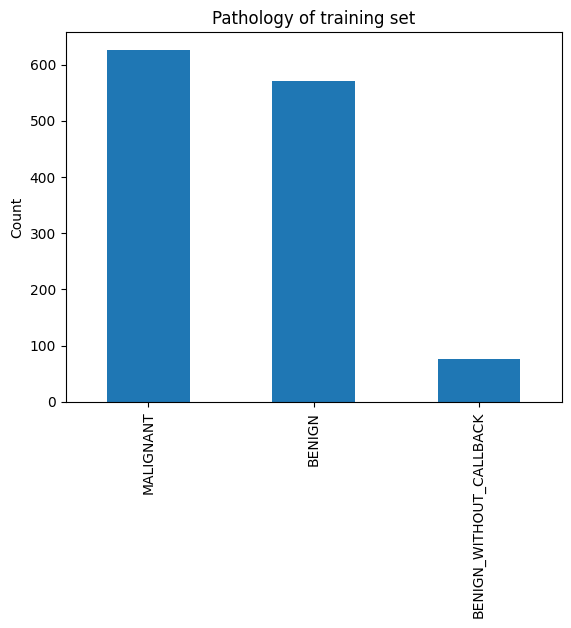

Dimension: (1273, 47)


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
train_raw = pd.read_csv("mass_case_description_train_set.csv")
test_raw = pd.read_csv("mass_case_description_test_set.csv")
keep_col = ["pathology","mass shape", "mass margins","left or right breast",
        "abnormality type","abnormality id","breast_density","image view"]
#print(d_overview(train_raw[keep_col]))
train_clean = basic_clean(train_raw, keep_col=keep_col)
test_clean = basic_clean(test_raw, keep_col=keep_col)
# add cols with zeros for those didn't exist in another dataset:
train_nms = train_clean.columns.to_list()
test_nms = test_clean.columns.to_list()
not_in_test = [x for x in train_nms if x not in test_nms]
not_in_train = [x for x in test_nms if x not in train_nms]
train_clean[not_in_train]=0
test_clean[not_in_test]=0

# Visualization of output classes:
counts = train_clean["pathology"].value_counts()
counts.plot.bar()
plt.title('Pathology of training set')
plt.ylabel('Count')
plt.show()
d_overview(train_clean)

# turn to array:
train_y = train_clean["pathology"].values
test_y = test_clean["pathology"].values
x_cols = train_clean.columns.to_list()[1:]
train_x = train_clean[x_cols].values
test_x = test_clean[x_cols].values
# change the y label to numeric:
nmtag = {"MALIGNANT":0, "BENIGN":1, "BENIGN_WITHOUT_CALLBACK":2}
train_y = np.vectorize(lambda x:nmtag[x])(train_y)
test_y = np.vectorize(lambda x:nmtag[x])(test_y)
# change dtype:
train_x=train_x.astype(float)
test_x=test_x.astype(float)
# train_y=train_y.astype(float) # keep output as int so pytorch know it's categorical
# test_y=test_y.astype(float)

### 3.2. (5 points) Preparing dataset

Map the $(X,Y)$ to a mini-batch setting coherent with `torch.utils.data.Dataset` and `torch.utils.data.Dataset`.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch import optim
from torch.utils.data import Dataset,DataLoader
from tqdm import trange
import itertools    
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [9]:
class CBISDataset(Dataset):
    def __init__(self, x, y):
        # Complete the method
        super().__init__() # OOPS Inheritance
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [10]:
# Complete code here
train_dataset = CBISDataset(train_x, train_y)
test_dataset = CBISDataset(test_x, test_y)

What are the input and output dimensions of your data?

**Ans**

The input dimension is 46 (46 features), and the output dimension is 3 (3 classes)

### 3.3. Multi-layered-perceptron (5 points)

Design a multi layer perceptron (MLP) with 2 hidden full connected layer apart from input layer. Use `ReLU` non-linearity as intermediate non-linearity. Please see diagram below:

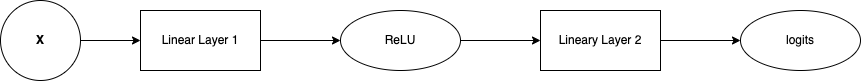

**Solution:**

 **Note**: I don't understand why we use logit function for multiclass classification

In [11]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=46, out_features=16)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(in_features=16, out_features=3)
        self.logit = torch.nn.Sigmoid()    
        self.model = torch.nn.Sequential(
            self.fc1,
            self.relu,
            self.fc2,
            self.logit
        )
    def forward(self, x):
        return self.model(x)

### 3.4. Implement the train function (15 points) 

- Followed by training the network for training for 1000 epochs and batch size of 100 samples.
- Collect average train loss over each epoch for all batch iterations. 
- Plot Training Loss

In [12]:
def train_fn(model, train_loader, optimizer, criterion):
    # Code the function
    # Return average loss for the epoch
    model.train()
    accumulate_loss = 0
    for (x,y) in train_loader:
        x=x.float()
        y_pred = model(x).squeeze()
        loss = criterion(y_pred, y)
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        accumulate_loss += loss.item()
    avg_loss = accumulate_loss/len(train_loader)
    return avg_loss

1. Create dataloaders to feed your network. You need to reshuffle your training samples for each epoch.
2. Train your network using following specifications:
    - `learning rate`: $10^{-2}$
    - `Optimizer`: SGD 
    - `Loss Function`: CrossEntropyLoss  
    - `Batch Size`: 100

In [13]:
# Complete code here
BATCH_SIZE = 100
# dataloader:
train_dataloader = DataLoader(dataset=train_dataset, batch_size = BATCH_SIZE, shuffle=True, generator=torch.manual_seed(0))
test_dataloader = DataLoader(dataset=test_dataset, batch_size = BATCH_SIZE, shuffle=True, generator=torch.manual_seed(1))
# > use shuffle=True to reshuffle each epoch

In [14]:
model_mlp = Network()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_mlp.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
NUM_EPOCHS = 1000
avg_losses = []
for epoch in trange(1, NUM_EPOCHS+1):
    loss = train_fn(model_mlp, train_dataloader, optimizer, criterion)
    if not epoch % 100:
        print(f"Average training loss for epoch {epoch}: {loss}")
    avg_losses.append(loss)

 12%|████▌                                   | 115/1000 [00:01<00:09, 91.82it/s]

Average training loss for epoch 100: 0.943157645372244


 22%|████████▌                               | 215/1000 [00:02<00:08, 92.21it/s]

Average training loss for epoch 200: 0.9262231817612281


 32%|████████████▌                           | 315/1000 [00:03<00:07, 91.72it/s]

Average training loss for epoch 300: 0.924701635654156


 42%|████████████████▌                       | 415/1000 [00:04<00:06, 91.59it/s]

Average training loss for epoch 400: 0.9220675826072693


 52%|████████████████████▌                   | 515/1000 [00:05<00:05, 89.91it/s]

Average training loss for epoch 500: 0.9200819730758667


 61%|████████████████████████▌               | 613/1000 [00:06<00:04, 91.70it/s]

Average training loss for epoch 600: 0.9154159426689148


 71%|████████████████████████████▌           | 713/1000 [00:07<00:03, 91.86it/s]

Average training loss for epoch 700: 0.9020931720733643


 81%|████████████████████████████████▌       | 813/1000 [00:08<00:02, 91.39it/s]

Average training loss for epoch 800: 0.8822067792599018


 91%|████████████████████████████████████▌   | 913/1000 [00:10<00:00, 91.38it/s]

Average training loss for epoch 900: 0.8583277968259958


100%|███████████████████████████████████████| 1000/1000 [00:10<00:00, 90.91it/s]

Average training loss for epoch 1000: 0.8203478959890512


Plot *loss vs epoch* curve using the `avg_losses` array:

**Ans**

Obviously, the learning curve hasn't reach steady state. This may be due to the slow learning rate or inadequate epoch.

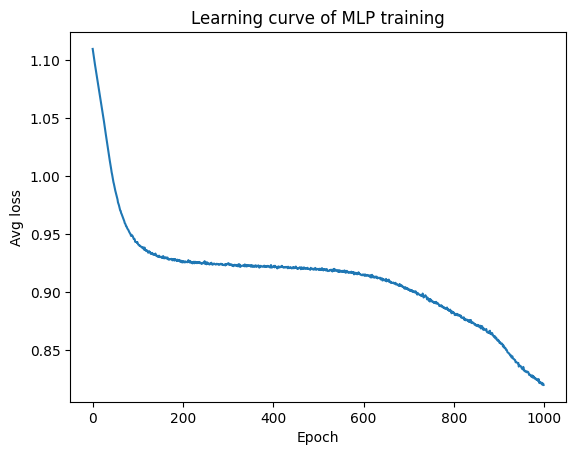

In [15]:
x_axis = list(range(1000))
plt.plot(x_axis, avg_losses)
plt.xlabel('Epoch')
plt.ylabel('Avg loss')
plt.title('Learning curve of MLP training')
plt.show()

### 3.5. Implement the test function (10 points) 

- Evaluate your model over test data. 
- Show confusion matrix and AUROC Curve (Class wise) for both test data

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
def cm(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    class_names = ['0: BENIGN','1: BENIGN_WC','2: MALIGNANT']
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')

In [17]:
def test(model, test_loader, loss_criterion):
    model.eval()
    loss_s = 0.0
    correct = 0
    y_preds = []
    y_trues = []
    with torch.no_grad():
        for (x,y) in test_loader:
            x = x.float()
            y_pred = model(x).squeeze()
            loss = criterion(y_pred, y)
            loss_s += loss.item()
            y_true = y.tolist()
            y_trues.extend(y_true)
            y_pred = (torch.argmax(y_pred, axis=1)).tolist()
            y_preds.extend(y_pred)
            correct += sum(map(lambda x,y:x==y, y_true,y_pred))/len(y_true)
    correct = correct / len(test_loader)
    loss_s = loss_s/ len(test_loader)
    return loss_s, correct, y_trues, y_preds

In [18]:
test_criterion = nn.CrossEntropyLoss()
loss, correct, y_true_mlp, y_pred_mlp = test(model_mlp, test_dataloader ,test_criterion)
print(f"Testing evaluation of MLP model: loss={loss:.5f}, accuracy={correct:.5f}")

Testing evaluation of MLP model: loss=0.85588, accuracy=0.70463


Confusion matrix, without normalization
[[111  34   0]
 [ 49 144   0]
 [  7  16   0]]


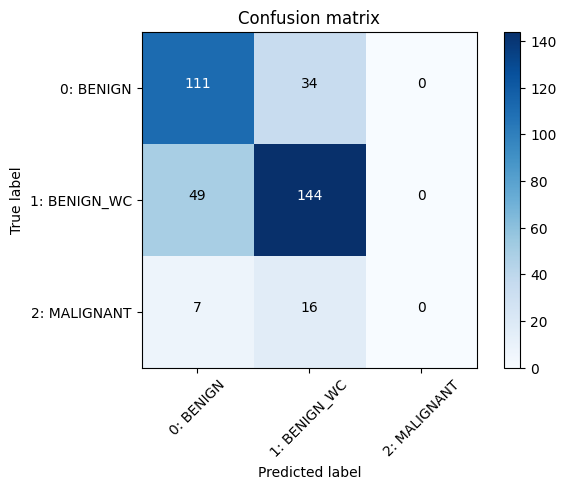

In [19]:
# Call method to plot confusion matrix
cm(y_true_mlp, y_pred_mlp)

### 3.5. Logistic Regression (10 points)

- Train a multi-class logistic regression model (in PyTorch) and compare its performance to MLP.

In [20]:
class LogisticReg(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticReg, self).__init__()
        self.linear = nn.Linear(n_input_features, 3) # 3 output
    def forward(self, x):
        y_predict = self.linear(x)  # keep linear because use cross entropy
        return y_predict

 11%|████▎                                  | 111/1000 [00:01<00:08, 107.64it/s]

Average training loss for epoch 100: 0.6317346829634446


 21%|████████▏                              | 211/1000 [00:01<00:07, 107.87it/s]

Average training loss for epoch 200: 0.5951139124540182


 31%|████████████▏                          | 311/1000 [00:02<00:06, 107.16it/s]

Average training loss for epoch 300: 0.5799686381450067


 42%|████████████████▍                      | 421/1000 [00:03<00:05, 106.98it/s]

Average training loss for epoch 400: 0.5663966880394862


 52%|████████████████████▎                  | 520/1000 [00:04<00:04, 106.86it/s]

Average training loss for epoch 500: 0.5622779726982117


 62%|████████████████████████▏              | 619/1000 [00:05<00:03, 108.13it/s]

Average training loss for epoch 600: 0.5582616948164426


 72%|████████████████████████████           | 718/1000 [00:06<00:02, 108.18it/s]

Average training loss for epoch 700: 0.5572472650271195


 82%|███████████████████████████████▊       | 817/1000 [00:07<00:01, 107.16it/s]

Average training loss for epoch 800: 0.5534124970436096


 92%|███████████████████████████████████▊   | 917/1000 [00:08<00:00, 108.14it/s]

Average training loss for epoch 900: 0.5474290389281052


100%|██████████████████████████████████████| 1000/1000 [00:09<00:00, 107.27it/s]


Average training loss for epoch 1000: 0.5420297063313998


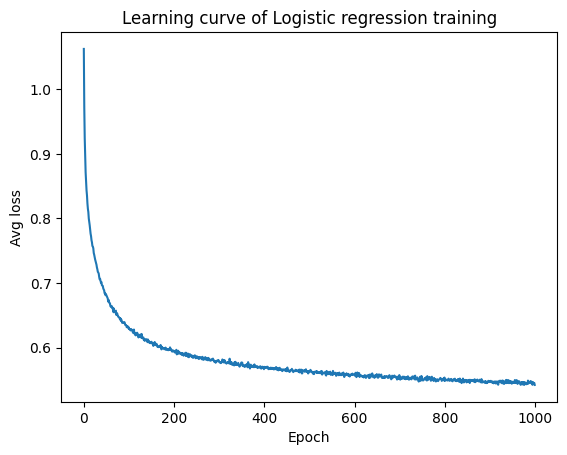

In [21]:
logreg_model = LogisticReg(46)
optimizer = torch.optim.SGD(logreg_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
NUM_EPOCHS = 1000
avg_losses_log = []
for epoch in trange(1, NUM_EPOCHS+1):
    loss = train_fn(logreg_model, train_dataloader, optimizer, criterion)
    if not epoch % 100:
        print(f"Average training loss for epoch {epoch}: {loss}")
    avg_losses_log.append(loss)
x_axis = list(range(1000))
plt.plot(x_axis, avg_losses_log)
plt.xlabel('Epoch')
plt.ylabel('Avg loss')
plt.title('Learning curve of Logistic regression training')
plt.show()   

In [22]:
test_criterion = nn.CrossEntropyLoss()
loss, correct, y_true_log, y_pred_log = test(logreg_model, test_dataloader ,test_criterion)
print(f"Testing evaluation of logistic model: loss={loss:.5f}, accuracy={correct:.5f}")

Testing evaluation of logistic model: loss=0.75063, accuracy=0.70602


Confusion matrix, without normalization
[[126  19   0]
 [ 68 125   0]
 [ 10  11   2]]


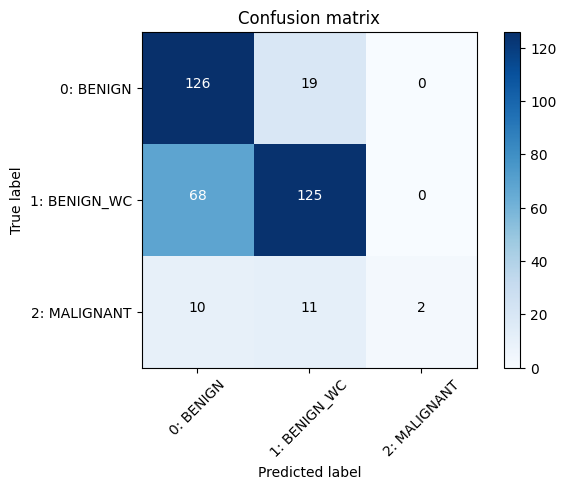

In [23]:
cm(y_true_log, y_pred_log)

### Bonus (10 points)


- Compare your training and test performance. Is your model trained properly? Suggest methods to improve its performance.

- For the assignment, you used SGD as the optimization function, Try [different optimizer](https://pytorch.org/docs/stable/optim.html) from PyTorch. Give sufficient reasoning if you observe any difference in performance and explanation on its working.

**Ans 1.**

The training accuracy of MLP was 5% higher than the testing(~70%). The performance was similar to logistic model. 

I tried several kinds of modification. Since the learning surve of the MLP doesn't seem to converge, I first increase the learning rate or the epoch, but the accuracy was similar.

The next modification I tried was for the network structure. I remove the sigmoid functioin at the end, and the performance becamse slightly worse.

My last modification is to add an extra hidden layer with ReLU activation. However, the performance was still not improved.

Another important issue about this problem is that, very few classes were classified to class 2(malignant).

Confusion matrix, without normalization
[[475 151   0]
 [ 95 475   0]
 [ 25  52   0]]
Training evaluation of logistic model: loss=0.81982, accuracy=0.74727


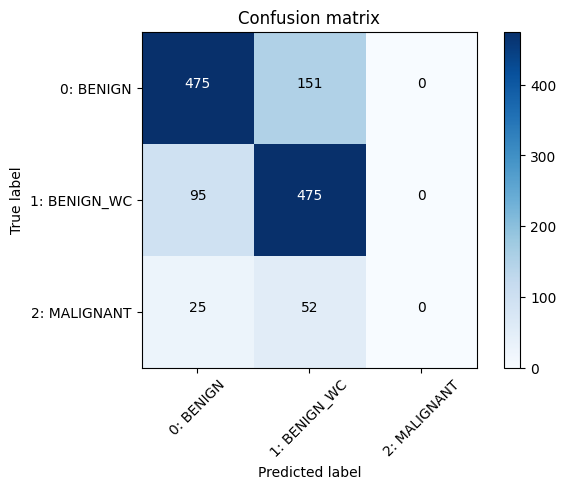

In [24]:
loss, correct, y_true_mlp, y_pred_mlp = test(model_mlp, train_dataloader ,test_criterion)
cm(y_true_mlp, y_pred_mlp)
print(f"Training evaluation of logistic model: loss={loss:.5f}, accuracy={correct:.5f}")

In [25]:
# Update the number of Epoch: didn't improve a lot
model_mlp = Network()
learning_rate = 0.05 # 0.01, 0.03
optimizer = torch.optim.SGD(model_mlp.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
NUM_EPOCHS = 1000    # 3000
avg_losses=[]
for epoch in trange(1, NUM_EPOCHS+1):
    loss = train_fn(model_mlp, train_dataloader, optimizer, criterion)
    if not epoch % 100:
        print(f"Average training loss for epoch {epoch}: {loss}")
    avg_losses.append(loss)


 12%|████▋                                   | 116/1000 [00:01<00:09, 89.92it/s]

Average training loss for epoch 100: 0.8870980005997878


 22%|████████▋                               | 216/1000 [00:02<00:08, 90.79it/s]

Average training loss for epoch 200: 0.7973105632341825


 32%|████████████▋                           | 316/1000 [00:03<00:07, 90.10it/s]

Average training loss for epoch 300: 0.7745918998351464


 42%|████████████████▋                       | 416/1000 [00:04<00:06, 90.89it/s]

Average training loss for epoch 400: 0.7649835302279546


 52%|████████████████████▋                   | 516/1000 [00:05<00:05, 90.97it/s]

Average training loss for epoch 500: 0.7621572797115033


 62%|████████████████████████▋               | 616/1000 [00:06<00:04, 90.87it/s]

Average training loss for epoch 600: 0.7589669548548185


 72%|████████████████████████████▋           | 716/1000 [00:07<00:03, 90.84it/s]

Average training loss for epoch 700: 0.7532249780801626


 82%|████████████████████████████████▋       | 816/1000 [00:09<00:02, 91.09it/s]

Average training loss for epoch 800: 0.7478843743984516


 92%|████████████████████████████████████▋   | 916/1000 [00:10<00:00, 89.99it/s]

Average training loss for epoch 900: 0.7448121997026297


100%|███████████████████████████████████████| 1000/1000 [00:11<00:00, 90.58it/s]

Average training loss for epoch 1000: 0.7420248710192167


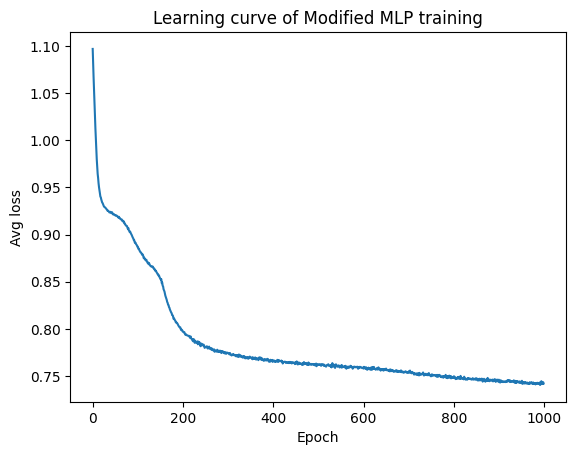

Testing evaluation of modified MLP model: loss=0.83880, accuracy=0.67434


In [26]:
x_axis = list(range(1000))
plt.plot(x_axis, avg_losses)
plt.xlabel('Epoch')
plt.ylabel('Avg loss')
plt.title('Learning curve of Modified MLP training')
plt.show()   
test_output = test(model_mlp, test_dataloader ,test_criterion)
print(f"Testing evaluation of modified MLP model: loss={test_output[0]:.5f}, accuracy={test_output[1]:.5f}")
# > No improvement after increasing epoch & learning rate

In [31]:
# Modification 2: 
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=46, out_features=16)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(in_features=16, out_features=3) 
        # self.logit = torch.nn.Sigmoid() 
        self.model = torch.nn.Sequential(
            self.fc1,
            self.relu,
            self.fc2
        )
    def forward(self, x):
        return self.model(x)
model_mlp = Network()
learning_rate = 0.05
optimizer = torch.optim.SGD(model_mlp.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
NUM_EPOCHS = 1000
avg_losses=[]
for epoch in trange(1, NUM_EPOCHS+1):
    loss = train_fn(model_mlp, train_dataloader, optimizer, criterion)
    if not epoch % 100:
        print(f"Average training loss for epoch {epoch}: {loss}")
    avg_losses.append(loss)

 11%|████▎                                   | 109/1000 [00:01<00:09, 92.81it/s]

Average training loss for epoch 100: 0.5460226054374988


 21%|████████▎                               | 209/1000 [00:02<00:08, 93.59it/s]

Average training loss for epoch 200: 0.5212299067240495


 31%|████████████▎                           | 309/1000 [00:03<00:07, 92.81it/s]

Average training loss for epoch 300: 0.5106460360380319


 41%|████████████████▎                       | 409/1000 [00:04<00:06, 93.94it/s]

Average training loss for epoch 400: 0.4970508859707759


 51%|████████████████████▎                   | 509/1000 [00:05<00:05, 92.71it/s]

Average training loss for epoch 500: 0.4913751666362469


 61%|████████████████████████▎               | 609/1000 [00:06<00:04, 92.95it/s]

Average training loss for epoch 600: 0.4863712306206043


 71%|████████████████████████████▎           | 709/1000 [00:07<00:03, 93.03it/s]

Average training loss for epoch 700: 0.4769219114230229


 82%|████████████████████████████████▊       | 819/1000 [00:08<00:01, 95.16it/s]

Average training loss for epoch 800: 0.47786421271470875


 91%|████████████████████████████████████▎   | 909/1000 [00:09<00:00, 94.18it/s]

Average training loss for epoch 900: 0.47567759110377383


100%|███████████████████████████████████████| 1000/1000 [00:10<00:00, 93.23it/s]

Average training loss for epoch 1000: 0.4713382904346173


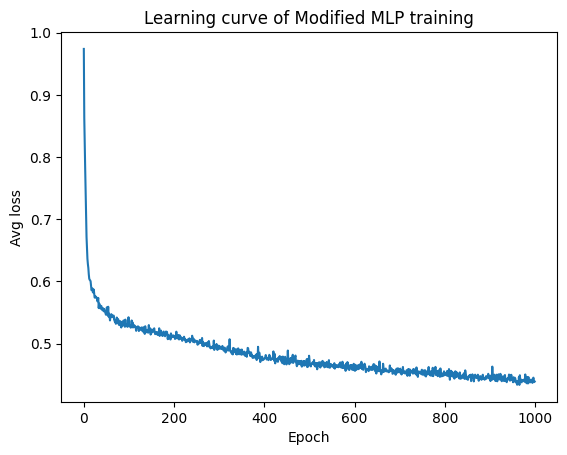

Testing evaluation of Modified MLP model: loss=0.85840, accuracy=0.67303


In [28]:
x_axis = list(range(1000))
plt.plot(x_axis, avg_losses)
plt.xlabel('Epoch')
plt.ylabel('Avg loss')
plt.title('Learning curve of Modified MLP training')
plt.show()   
test_output = test(model_mlp, test_dataloader ,test_criterion)
print(f"Testing evaluation of Modified MLP model: loss={test_output[0]:.5f}, accuracy={test_output[1]:.5f}")
# > Improve after


 11%|████▌                                   | 114/1000 [00:01<00:11, 79.83it/s]

Average training loss for epoch 100: 0.922739890905527


 21%|████████▎                               | 209/1000 [00:02<00:09, 79.84it/s]

Average training loss for epoch 200: 0.9231225618949304


 31%|████████████▍                           | 310/1000 [00:03<00:08, 79.75it/s]

Average training loss for epoch 300: 0.9221486632640545


 41%|████████████████▍                       | 410/1000 [00:05<00:07, 79.34it/s]

Average training loss for epoch 400: 0.9226445188889136


 51%|████████████████████▍                   | 510/1000 [00:06<00:06, 80.63it/s]

Average training loss for epoch 500: 0.9214331736931434


 62%|████████████████████████▌               | 615/1000 [00:07<00:04, 79.59it/s]

Average training loss for epoch 600: 0.9226716160774231


 72%|████████████████████████████▌           | 715/1000 [00:09<00:03, 80.13it/s]

Average training loss for epoch 700: 0.9208143215913039


 81%|████████████████████████████████▎       | 809/1000 [00:10<00:02, 79.78it/s]

Average training loss for epoch 800: 0.8978675558016851


 91%|████████████████████████████████████▍   | 911/1000 [00:11<00:01, 80.15it/s]

Average training loss for epoch 900: 0.8441689748030442


100%|███████████████████████████████████████| 1000/1000 [00:12<00:00, 79.32it/s]


Average training loss for epoch 1000: 0.8351126542458167


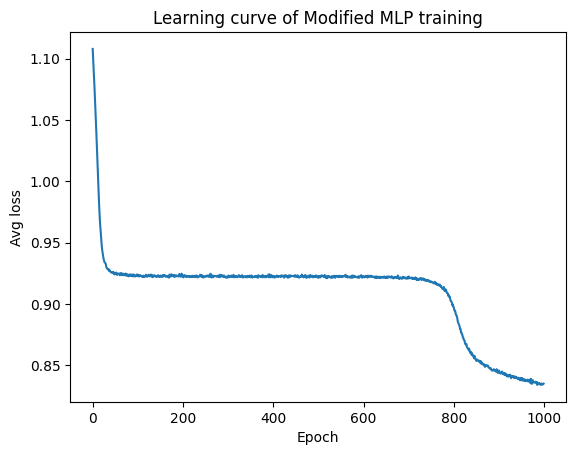

Testing evaluation of modified MLP model: loss=0.90706, accuracy=0.39607


In [30]:
# Modification 3: 
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=46, out_features=32)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(in_features=32, out_features=16) 
        self.fc3 = torch.nn.Linear(in_features=16, out_features=3)
        self.logit = torch.nn.Sigmoid() 
        self.model = torch.nn.Sequential(
            self.fc1,
            self.relu,
            self.fc2,
            self.relu,
            self.fc3,
            self.logit
        )
    def forward(self, x):
        return self.model(x)
model_mlp = Network()
learning_rate = 0.05
optimizer = torch.optim.SGD(model_mlp.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
NUM_EPOCHS = 1000
avg_losses=[]
for epoch in trange(1, NUM_EPOCHS+1):
    loss = train_fn(model_mlp, train_dataloader, optimizer, criterion)
    if not epoch % 100:
        print(f"Average training loss for epoch {epoch}: {loss}")
    avg_losses.append(loss)
x_axis = list(range(1000))
plt.plot(x_axis, avg_losses)
plt.xlabel('Epoch')
plt.ylabel('Avg loss')
plt.title('Learning curve of Modified MLP training')
plt.show()   
test_output = test(model_mlp, test_dataloader ,test_criterion)
print(f"Testing evaluation of modified MLP model: loss={test_output[0]:.5f}, accuracy={test_output[1]:.5f}")
# > No improvement after increasing epoch & learning rate
